In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

/Users/dsr/Documents/HustleProjects/exploring_machine_learning/venv/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [3]:
y_pred

array([1])

/Users/dsr/Documents/HustleProjects/exploring_machine_learning/venv/lib/python2.7/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


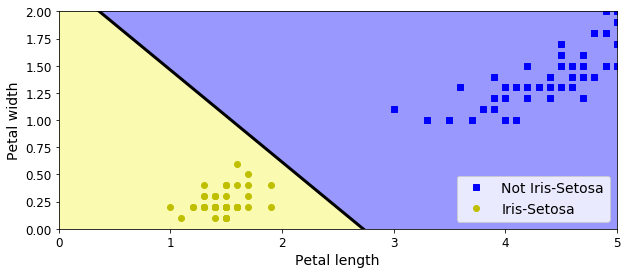

In [4]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()

In [5]:
def logit(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

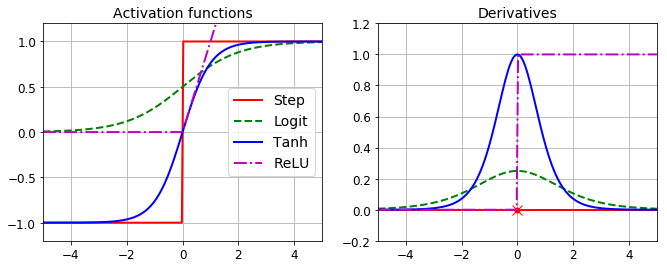

In [6]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="Step")
plt.plot(z, logit(z), "g--", linewidth=2, label="Logit")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="Logit")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

In [7]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

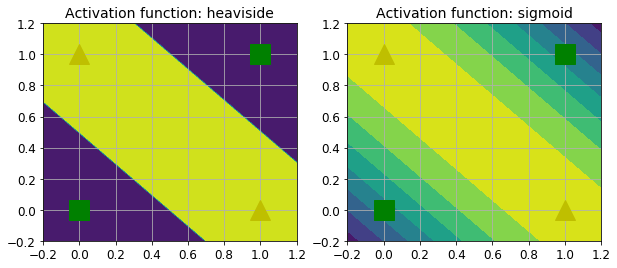

In [8]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

In [9]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("/tmp/data/")

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [10]:
X_train = mnist.train.images
X_test = mnist.test.images
y_train = mnist.train.labels.astype("int")
y_test = mnist.test.labels.astype("int")

In [11]:
import tensorflow as tf

config = tf.contrib.learn.RunConfig(tf_random_seed=42) # not shown in the config

feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                         feature_columns=feature_cols, config=config)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) # if TensorFlow >= 1.1
dnn_clf.fit(X_train, y_train, batch_size=50, steps=40000)

INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_task_type': None, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x104554710>, '_model_dir': '/var/folders/0t/1b6bbpcj52xdthkg2d6g2sr40000gn/T/tmppE6pdw', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_tf_random_seed': 42, '_save_summary_steps': 100, '_environment': 'local', '_num_worker_replicas': 0, '_task_id': 0, '_log_step_count_steps': 100, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_evaluation_master': '', '_master': ''}
Instructions for updating:
Please switch to tf.train.get_global_step
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/0t/1b6bbpcj52xdthkg2d6g2sr40000gn/T/tmppE6pdw/model.ckpt.
INFO:tensorflow:loss = 2.40058, step = 1
INFO:tensorflow:global_step/sec: 270.229
INFO:tensorf

INFO:tensorflow:loss = 0.0213878, step = 7001 (0.506 sec)
INFO:tensorflow:global_step/sec: 165.222
INFO:tensorflow:loss = 0.00836719, step = 7101 (0.607 sec)
INFO:tensorflow:global_step/sec: 107.952
INFO:tensorflow:loss = 0.0488339, step = 7201 (0.926 sec)
INFO:tensorflow:global_step/sec: 190.883
INFO:tensorflow:loss = 0.00950404, step = 7301 (0.520 sec)
INFO:tensorflow:global_step/sec: 144.153
INFO:tensorflow:loss = 0.0169789, step = 7401 (0.696 sec)
INFO:tensorflow:global_step/sec: 196.426
INFO:tensorflow:loss = 0.0107572, step = 7501 (0.509 sec)
INFO:tensorflow:global_step/sec: 149.344
INFO:tensorflow:loss = 0.0105873, step = 7601 (0.671 sec)
INFO:tensorflow:global_step/sec: 191.243
INFO:tensorflow:loss = 0.00593114, step = 7701 (0.520 sec)
INFO:tensorflow:global_step/sec: 206.93
INFO:tensorflow:loss = 0.00519743, step = 7801 (0.483 sec)
INFO:tensorflow:global_step/sec: 190.781
INFO:tensorflow:loss = 0.00644975, step = 7901 (0.526 sec)
INFO:tensorflow:global_step/sec: 232.311
INFO:t

INFO:tensorflow:loss = 0.00101589, step = 15201 (0.358 sec)
INFO:tensorflow:global_step/sec: 276.976
INFO:tensorflow:loss = 0.00229391, step = 15301 (0.360 sec)
INFO:tensorflow:global_step/sec: 279.275
INFO:tensorflow:loss = 0.0028404, step = 15401 (0.359 sec)
INFO:tensorflow:global_step/sec: 277.302
INFO:tensorflow:loss = 0.00541212, step = 15501 (0.361 sec)
INFO:tensorflow:global_step/sec: 281.038
INFO:tensorflow:loss = 0.00358959, step = 15601 (0.356 sec)
INFO:tensorflow:global_step/sec: 275.59
INFO:tensorflow:loss = 0.00588915, step = 15701 (0.363 sec)
INFO:tensorflow:global_step/sec: 277.533
INFO:tensorflow:loss = 0.000818647, step = 15801 (0.359 sec)
INFO:tensorflow:global_step/sec: 284.887
INFO:tensorflow:loss = 0.000857814, step = 15901 (0.351 sec)
INFO:tensorflow:global_step/sec: 282.296
INFO:tensorflow:loss = 0.00651137, step = 16001 (0.356 sec)
INFO:tensorflow:global_step/sec: 278.966
INFO:tensorflow:loss = 0.00306222, step = 16101 (0.356 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 269.03
INFO:tensorflow:loss = 0.000505153, step = 23401 (0.372 sec)
INFO:tensorflow:global_step/sec: 267.49
INFO:tensorflow:loss = 0.000766654, step = 23501 (0.374 sec)
INFO:tensorflow:global_step/sec: 266.799
INFO:tensorflow:loss = 0.000556651, step = 23601 (0.375 sec)
INFO:tensorflow:global_step/sec: 267.376
INFO:tensorflow:loss = 0.000105218, step = 23701 (0.375 sec)
INFO:tensorflow:global_step/sec: 267.698
INFO:tensorflow:loss = 0.000919802, step = 23801 (0.372 sec)
INFO:tensorflow:global_step/sec: 269.474
INFO:tensorflow:loss = 0.00179801, step = 23901 (0.375 sec)
INFO:tensorflow:global_step/sec: 248.915
INFO:tensorflow:loss = 0.00146623, step = 24001 (0.400 sec)
INFO:tensorflow:global_step/sec: 252.753
INFO:tensorflow:loss = 0.000645721, step = 24101 (0.395 sec)
INFO:tensorflow:global_step/sec: 263.658
INFO:tensorflow:loss = 0.00170859, step = 24201 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.069
INFO:tensorflow:loss = 0.000190123, step = 243

INFO:tensorflow:global_step/sec: 267.692
INFO:tensorflow:loss = 0.000200015, step = 31501 (0.372 sec)
INFO:tensorflow:global_step/sec: 270.887
INFO:tensorflow:loss = 0.000326743, step = 31601 (0.369 sec)
INFO:tensorflow:global_step/sec: 269.236
INFO:tensorflow:loss = 0.000636576, step = 31701 (0.372 sec)
INFO:tensorflow:global_step/sec: 272.271
INFO:tensorflow:loss = 0.000169163, step = 31801 (0.369 sec)
INFO:tensorflow:global_step/sec: 264.681
INFO:tensorflow:loss = 0.00069206, step = 31901 (0.376 sec)
INFO:tensorflow:global_step/sec: 269.409
INFO:tensorflow:loss = 0.000129269, step = 32001 (0.373 sec)
INFO:tensorflow:global_step/sec: 262.294
INFO:tensorflow:loss = 0.000392807, step = 32101 (0.380 sec)
INFO:tensorflow:global_step/sec: 270.508
INFO:tensorflow:loss = 0.00115589, step = 32201 (0.372 sec)
INFO:tensorflow:global_step/sec: 264.636
INFO:tensorflow:loss = 0.00056562, step = 32301 (0.375 sec)
INFO:tensorflow:global_step/sec: 262.899
INFO:tensorflow:loss = 0.000176759, step = 3

INFO:tensorflow:global_step/sec: 265.688
INFO:tensorflow:loss = 0.000623901, step = 39601 (0.375 sec)
INFO:tensorflow:global_step/sec: 268.947
INFO:tensorflow:loss = 0.000144656, step = 39701 (0.372 sec)
INFO:tensorflow:global_step/sec: 271.688
INFO:tensorflow:loss = 0.00113882, step = 39801 (0.369 sec)
INFO:tensorflow:global_step/sec: 267.212
INFO:tensorflow:loss = 0.000799873, step = 39901 (0.373 sec)
INFO:tensorflow:Saving checkpoints for 40000 into /var/folders/0t/1b6bbpcj52xdthkg2d6g2sr40000gn/T/tmppE6pdw/model.ckpt.
INFO:tensorflow:Loss for final step: 0.00044029.


SKCompat()

In [12]:
from sklearn.metrics import accuracy_score

y_pred = dnn_clf.predict(X_test)
accuracy_score(y_test, y_pred['classes'])

INFO:tensorflow:Restoring parameters from /var/folders/0t/1b6bbpcj52xdthkg2d6g2sr40000gn/T/tmppE6pdw/model.ckpt-40000


0.98350000000000004

In [13]:
from sklearn.metrics import log_loss

y_pred_proba = y_pred['probabilities']
log_loss(y_test, y_pred_proba)

0.071474514666464845

In [14]:
import tensorflow as tf

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [15]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [16]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [17]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

In [18]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [19]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [20]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [21]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [22]:
n_epochs = 40
batch_size = 50

In [23]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: mnist.validation.images,
                                            y: mnist.validation.labels})
        print(epoch, "Train accuracy:", acc_train, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Train accuracy: 0.9 Val accuracy: 0.9146
1 Train accuracy: 0.94 Val accuracy: 0.9348
2 Train accuracy: 0.92 Val accuracy: 0.9466
3 Train accuracy: 0.96 Val accuracy: 0.9508
4 Train accuracy: 0.92 Val accuracy: 0.9586
5 Train accuracy: 0.94 Val accuracy: 0.9584
6 Train accuracy: 0.98 Val accuracy: 0.9608
7 Train accuracy: 0.96 Val accuracy: 0.9636
8 Train accuracy: 0.92 Val accuracy: 0.9638
9 Train accuracy: 0.96 Val accuracy: 0.965
10 Train accuracy: 0.98 Val accuracy: 0.9686
11 Train accuracy: 0.94 Val accuracy: 0.9686
12 Train accuracy: 1.0 Val accuracy: 0.9702
13 Train accuracy: 0.94 Val accuracy: 0.9686
14 Train accuracy: 1.0 Val accuracy: 0.9716
15 Train accuracy: 1.0 Val accuracy: 0.973
16 Train accuracy: 1.0 Val accuracy: 0.9736
17 Train accuracy: 0.98 Val accuracy: 0.9736
18 Train accuracy: 1.0 Val accuracy: 0.9752
19 Train accuracy: 1.0 Val accuracy: 0.975
20 Train accuracy: 0.98 Val accuracy: 0.9748
21 Train accuracy: 1.0 Val accuracy: 0.975
22 Train accuracy: 1.0 Val accur

In [24]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    X_new_scaled = mnist.test.images[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [25]:
print("Predicted classes:", y_pred)
print("Actual classes:   ", mnist.test.labels[:20])

Predicted classes: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
Actual classes:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [26]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [27]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [28]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [29]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
    loss_summary = tf.summary.scalar('log_loss', loss)

In [30]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [31]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    accuracy_summary = tf.summary.scalar('accuracy', accuracy)

In [32]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [33]:
from datetime import datetime

def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "tf_logs"
    if prefix:
        prefix += "-"
    name = prefix + "run-" + now
    return "{}/{}/".format(root_logdir, name)

In [34]:
logdir = log_dir("mnist_dnn")

In [35]:
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

In [36]:
X_valid = mnist.validation.images
y_valid = mnist.validation.labels

In [37]:
m, n = X_train.shape

In [38]:
n_epochs = 10001
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

checkpoint_path = "/tmp/my_deep_mnist_model.ckpt"
checkpoint_epoch_path = checkpoint_path + ".epoch"
final_model_path = "./my_deep_mnist_model"

best_loss = np.infty
epochs_without_progress = 0
max_epochs_without_progress = 50

with tf.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path):
        # if the checkpoint file exists, restore the model and load the epoch number
        with open(checkpoint_epoch_path, "rb") as f:
            start_epoch = int(f.read())
        print("Training was interrupted. Continuing at epoch", start_epoch)
        saver.restore(sess, checkpoint_path)
    else:
        start_epoch = 0
        sess.run(init)

    for epoch in range(start_epoch, n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val, loss_val, accuracy_summary_str, loss_summary_str = sess.run([accuracy, loss, accuracy_summary, loss_summary], feed_dict={X: X_valid, y: y_valid})
        file_writer.add_summary(accuracy_summary_str, epoch)
        file_writer.add_summary(loss_summary_str, epoch)
        if epoch % 5 == 0:
            print("Epoch:", epoch,
                  "\tValidation accuracy: {:.3f}%".format(accuracy_val * 100),
                  "\tLoss: {:.5f}".format(loss_val))
            saver.save(sess, checkpoint_path)
            with open(checkpoint_epoch_path, "wb") as f:
                f.write(b"%d" % (epoch + 1))
            if loss_val < best_loss:
                saver.save(sess, final_model_path)
                best_loss = loss_val
            else:
                epochs_without_progress += 5
                if epochs_without_progress > max_epochs_without_progress:
                    print("Early stopping")
                    break

Epoch: 0 	Validation accuracy: 90.500% 	Loss: 0.35332
Epoch: 5 	Validation accuracy: 95.160% 	Loss: 0.17458
Epoch: 10 	Validation accuracy: 96.660% 	Loss: 0.12621
Epoch: 15 	Validation accuracy: 97.280% 	Loss: 0.10400
Epoch: 20 	Validation accuracy: 97.560% 	Loss: 0.09106
Epoch: 25 	Validation accuracy: 97.820% 	Loss: 0.08107
Epoch: 30 	Validation accuracy: 97.800% 	Loss: 0.07598
Epoch: 35 	Validation accuracy: 97.840% 	Loss: 0.07217
Epoch: 40 	Validation accuracy: 97.880% 	Loss: 0.06854
Epoch: 45 	Validation accuracy: 98.000% 	Loss: 0.06897
Epoch: 50 	Validation accuracy: 98.020% 	Loss: 0.06659
Epoch: 55 	Validation accuracy: 98.060% 	Loss: 0.06705
Epoch: 60 	Validation accuracy: 98.140% 	Loss: 0.06502
Epoch: 65 	Validation accuracy: 98.180% 	Loss: 0.06537
Epoch: 70 	Validation accuracy: 98.160% 	Loss: 0.06651
Epoch: 75 	Validation accuracy: 98.180% 	Loss: 0.06570
Epoch: 80 	Validation accuracy: 98.120% 	Loss: 0.06530
Epoch: 85 	Validation accuracy: 98.160% 	Loss: 0.06688
Epoch: 90 	V

In [43]:
os.remove(checkpoint_epoch_path)

OSError: [Errno 2] No such file or directory: '/tmp/my_deep_mnist_model.ckpt.epoch'

In [44]:
with tf.Session() as sess:
    saver.restore(sess, final_model_path)
    accuracy_val = accuracy.eval(feed_dict={X: X_test, y: y_test})

INFO:tensorflow:Restoring parameters from ./my_deep_mnist_model


In [41]:
accuracy_val

0.97860003